# Example of a spin test between two correlated and uncorrelated continous maps on the unfolded hippocampus

In [1]:
import matplotlib.pyplot as plt
import nibabel as nib
from hippo_spin_testing import interpolate_densities
from hippo_spin_testing import spin_test
import numpy as np

### Visualize data

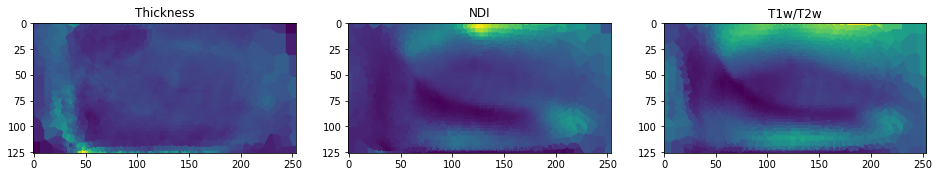

In [2]:
#Load in example maps
thickness = 'datasets/thickness_midsurf_L_mean.shape.gii'
NDI = 'datasets/NDI_midsurf_L_mean.shape.gii'
T1divT2 = 'datasets/T1wdivT2w_midsurf_L.shape.gii'

#Load data for visualization only
thickdata = nib.load(thickness).agg_data()
NDIdata = nib.load(NDI).agg_data()
T1divT2data = nib.load(T1divT2).agg_data()

thickdatainterp = interpolate_densities.density_interp('1mm','unfoldiso',thickdata)[0]
thickdatainterp = np.reshape(thickdatainterp,(126,254))#get maps to 124x256
NDIdatainterp = interpolate_densities.density_interp('1mm','unfoldiso',NDIdata)[0]
NDIdatainterp = np.reshape(NDIdatainterp,(126,254))#get maps to 124x256
T1divT2datainterp = interpolate_densities.density_interp('1mm','unfoldiso',T1divT2data)[0]
T1divT2datainterp = np.reshape(T1divT2datainterp,(126,254))#get maps to 124x256

#Visualize example maps
fig, axs = plt.subplots(1,3,figsize=(16,9))
axs[0].imshow(thickdatainterp)
axs[0].set_title('Thickness')
axs[1].imshow(NDIdatainterp)
axs[1].set_title('NDI')
axs[2].imshow(T1divT2datainterp)
axs[2].set_title('T1w/T2w')
plt.show()


### Run spin test (two highly correlated maps)

In [3]:
NDI = 'datasets/NDI_midsurf_L_mean.shape.gii'
T1divT2 = 'datasets/T1wdivT2w_midsurf_L.shape.gii'

[metricnull,permutedimg,pval,r_obs] = spin_test.spin_test(T1divT2,NDI,5000,'spearman')

p-value between NDI and T1w/T2w = 0.0


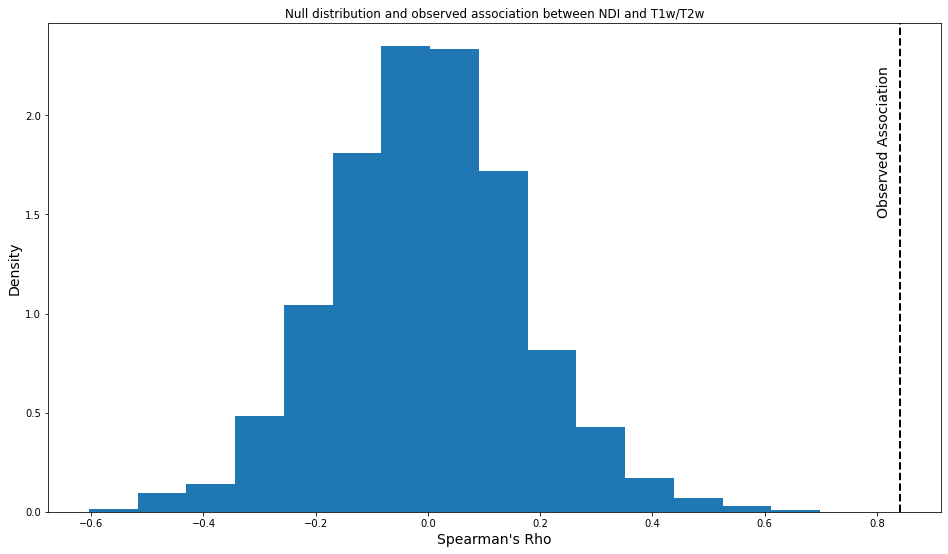

In [18]:
print(f'p-value between NDI and T1w/T2w = {pval:.6}')
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(metricnull,bins=15,density=True)
ax.axvline(r_obs, lw=2, ls='--', color='k')
plt.text(0.8,1.5,'Observed Association',rotation=90,fontsize=14)
plt.xlabel("Spearman's Rho",fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.title('Null distribution and observed association between NDI and T1w/T2w')
plt.show()

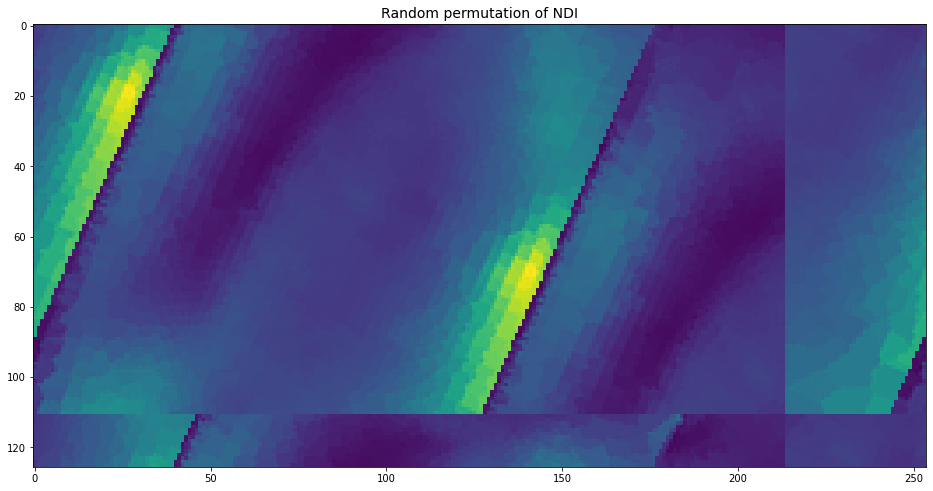

In [48]:
#Visualize a random permuted unfolded map
fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(permutedimg[:,:,900])
plt.title('Random permutation of NDI',fontsize=14)
plt.show()

### Run spin test (two uncorrelated maps)

In [49]:
thickness = 'datasets/thickness_midsurf_L_mean.shape.gii'
NDI = 'datasets/NDI_midsurf_L_mean.shape.gii'

[metricnull,permutedimg,pval,r_obs] = spin_test.spin_test(thickness,NDI,5000,'spearman')

p-value between NDI and Thickness = 0.4572


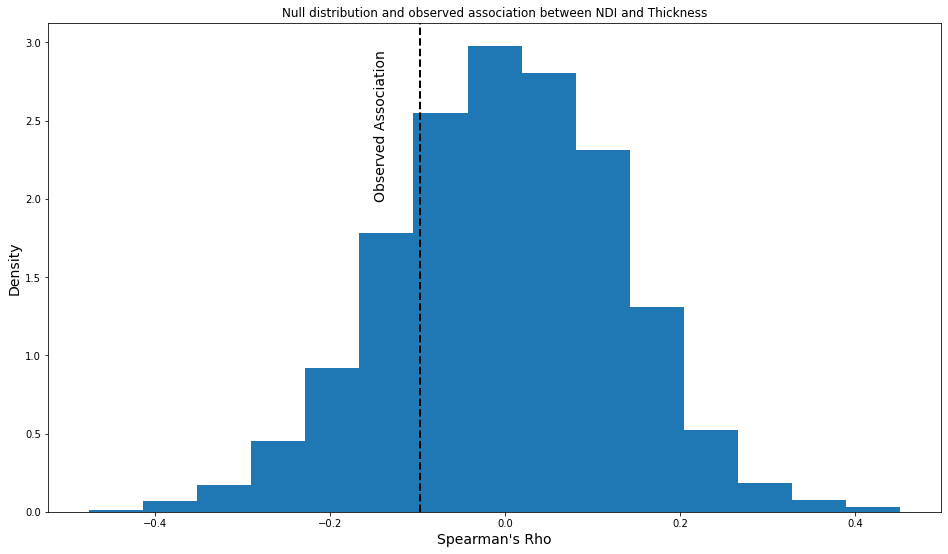

In [53]:
print(f'p-value between NDI and Thickness = {pval:.6}')
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(metricnull,bins=15,density=True)
ax.axvline(r_obs, lw=2, ls='--', color='k')
plt.text(-0.15,2,'Observed Association',rotation=90,fontsize=14)
plt.xlabel("Spearman's Rho",fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.title('Null distribution and observed association between NDI and Thickness')
plt.show()